<a href="https://colab.research.google.com/github/mhtasnia/DS422/blob/main/lab_report01_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Create the .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle/

# Create an empty kaggle.json file
!touch ~/.kaggle/kaggle.json

# Define your Kaggle API token as a Python dictionary
api_token = {"username":"Kaggle_username", "key":"kaggle-key"}

# Import the json module to work with JSON data
import json

# Open the kaggle.json file in write mode and dump the API token into it
# This path is correct for Google Colab.
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Set secure permissions for the kaggle.json file (read/write only for owner)
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API credentials have been set up successfully!")

Kaggle API credentials have been set up successfully!


In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("✅ Kaggle API token successfully installed.")

✅ Kaggle API token successfully installed.


In [15]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **1. Histogram**

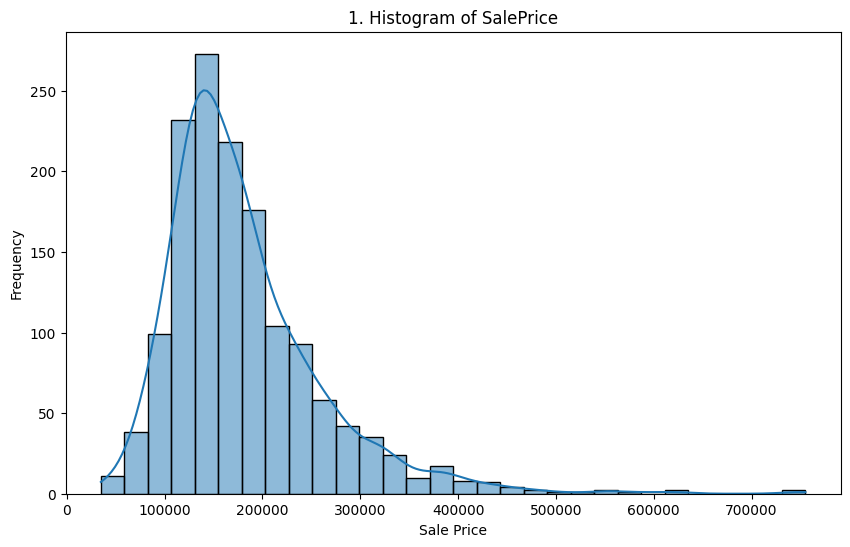

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('1. Histogram of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

This plot shows the distribution of house prices. It's right-skewed, meaning most houses are in the lower-to-mid price range, with a few very expensive outliers.

# **2. Density Plot**

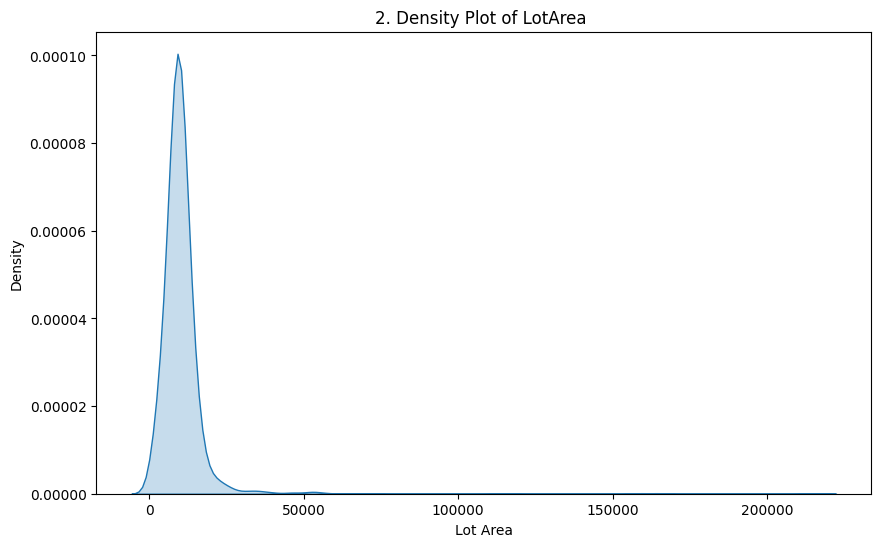

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['LotArea'], fill=True)
plt.title('2. Density Plot of LotArea ')
plt.xlabel('Lot Area')
plt.ylabel('Density')
plt.show()

This density plot shows the distribution of lot area. It's very right-skewed, meaning most houses are in the lower range of lot area, with a few very big lot area outliers.

# **3. Boxplot**

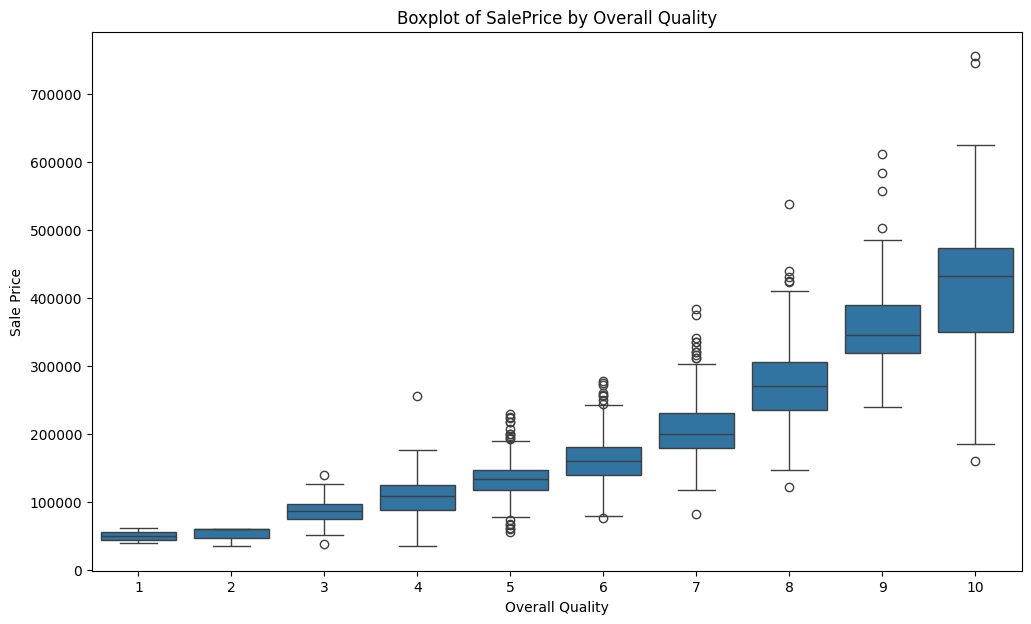

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Boxplot of SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

This plot is great for comparing a numeric value across different categories. its clearly visible that as the OverallQual (Overall Quality) increases, the median SalePrice also increases significantly.

# **4. Violin Plot**

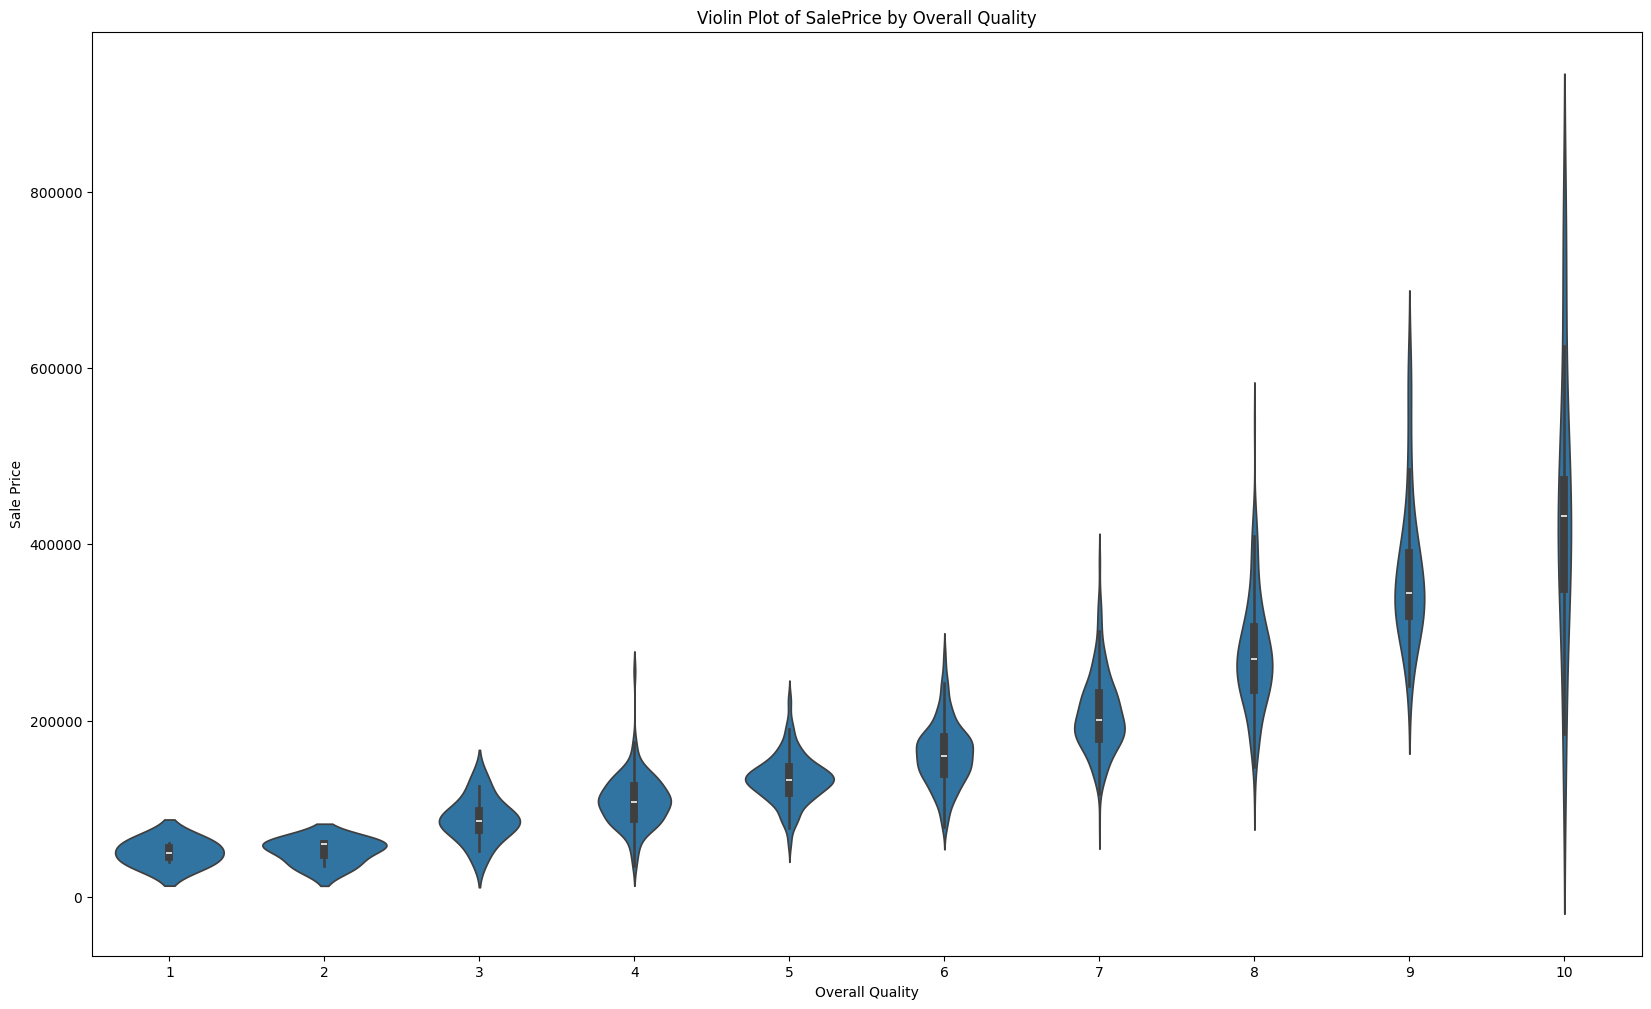

In [31]:
plt.figure(figsize=(20, 12))
sns.violinplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Violin Plot of SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

Like the boxplot, this shows the price-quality relationship. The "violin" shape also shows the distribution at each quality level

# **5. Scatter Plot**

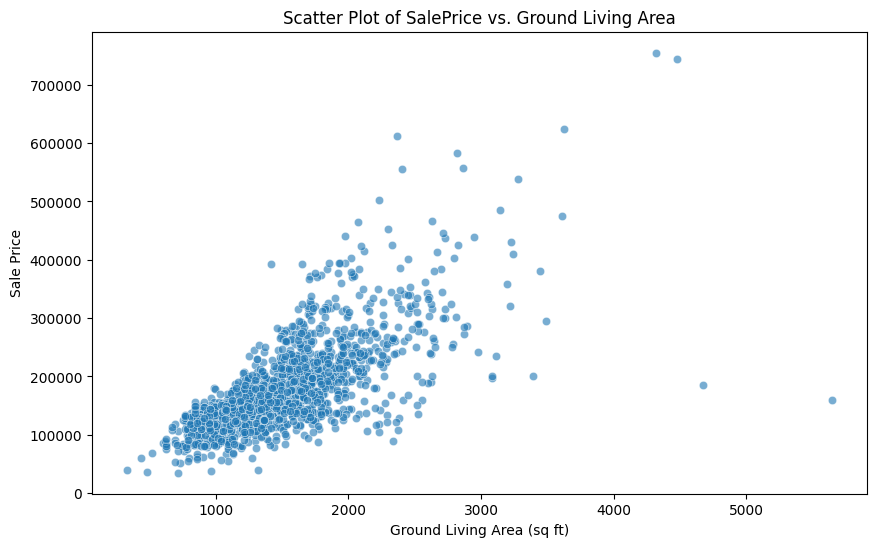

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.6)
plt.title('Scatter Plot of SalePrice vs. Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

This plot shows the positive correlation between living area and price. As GrLivArea goes up, SalePrice also tends to go up.

# **6. Correlation/ 7. Heatmap**

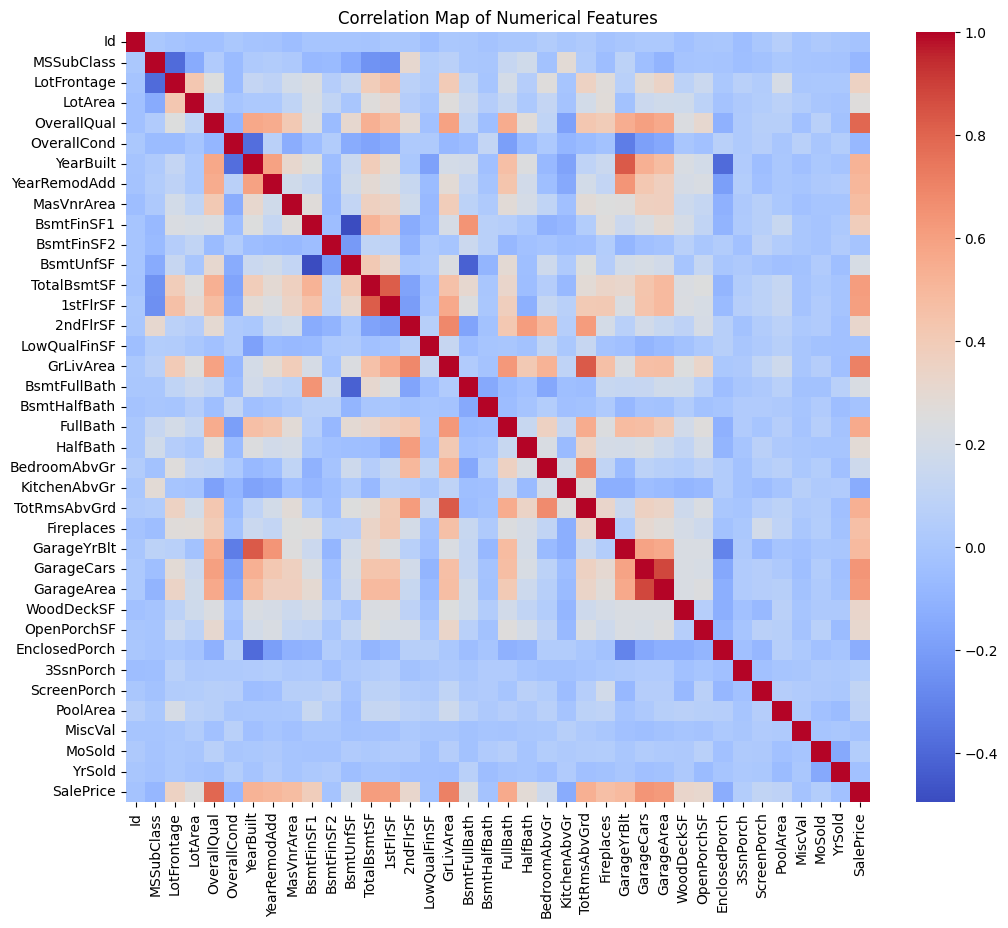

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Correlation Map of Numerical Features')
plt.show()

This shows how strongly all numeric variables are related to each other.

# **8. Bar chart**

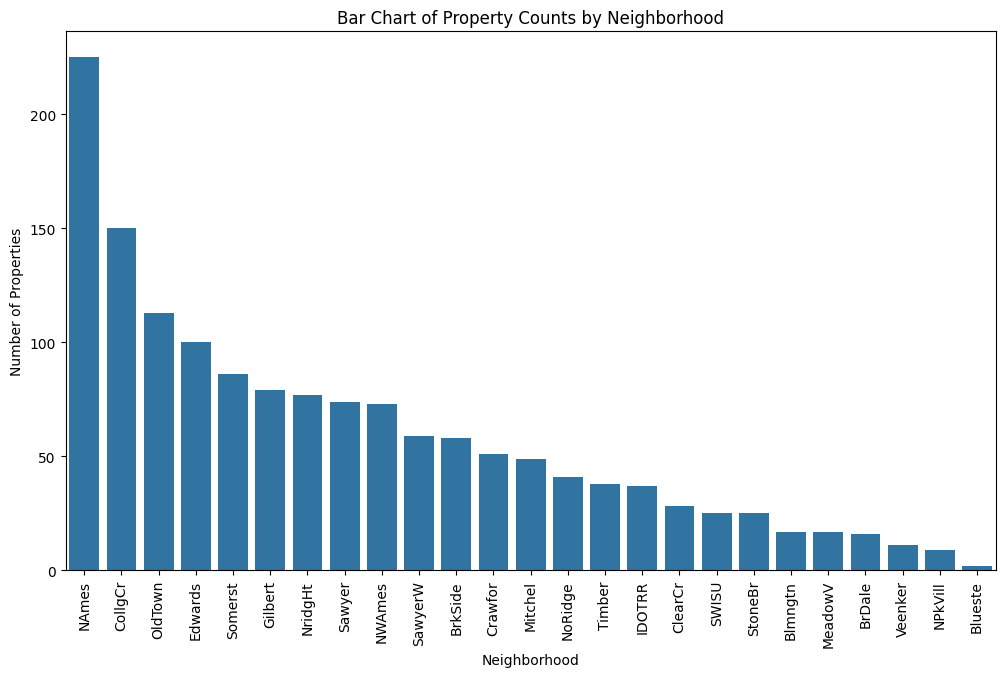

In [35]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Neighborhood', data=df, order=df['Neighborhood'].value_counts().index)
plt.title('Bar Chart of Property Counts by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Properties')
plt.xticks(rotation=90)
plt.show()

This plot shows you which neighborhoods have the most or fewest houses in the dataset

# **9. Grouped Bar Chart**

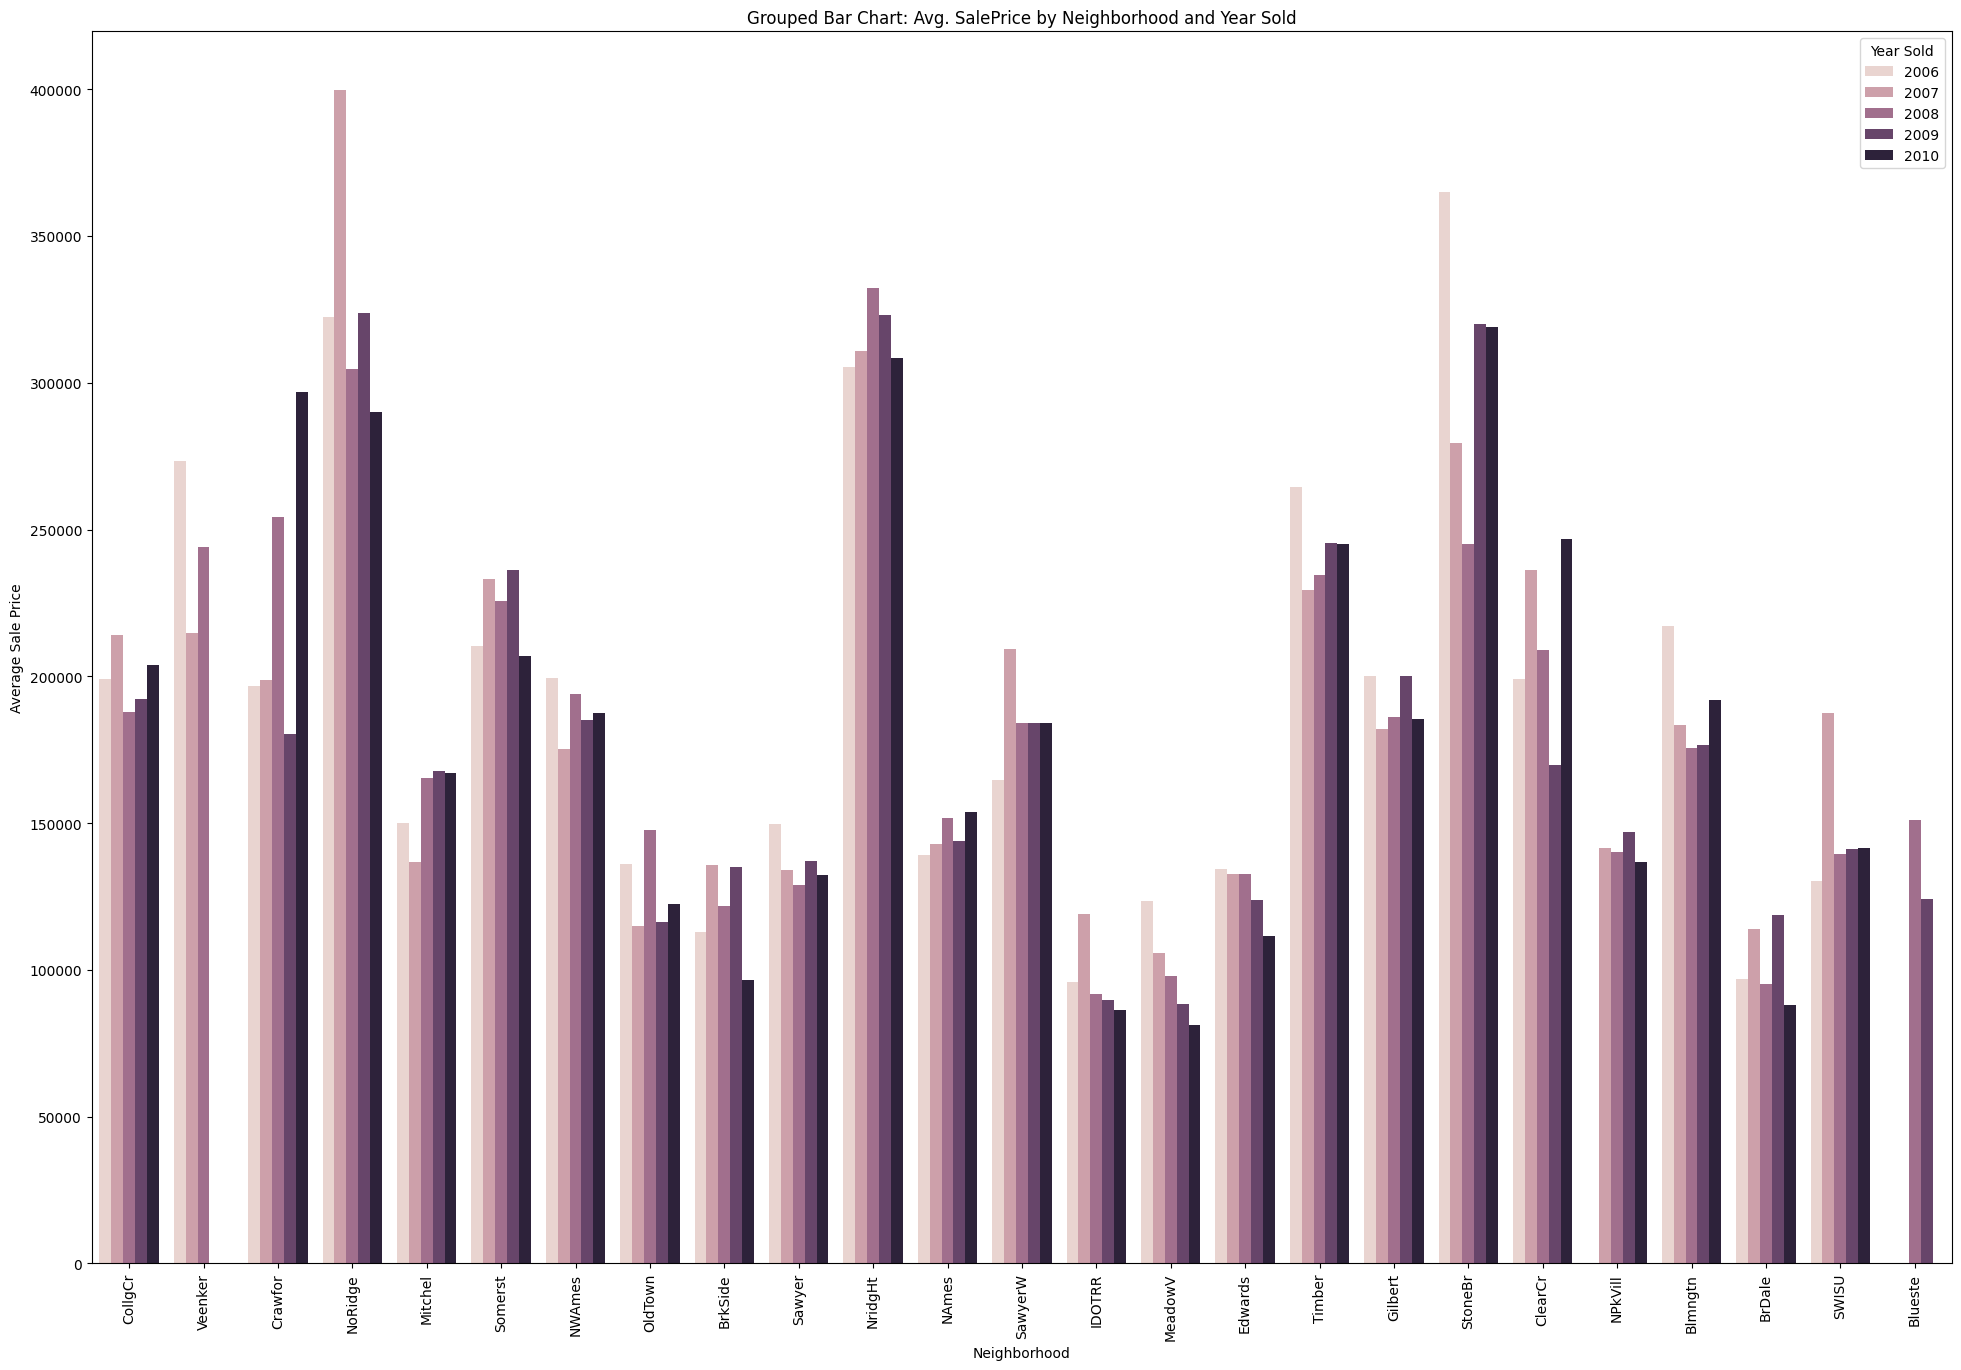

In [41]:
plt.figure(figsize=(24, 16))
sns.barplot(x='Neighborhood', y='SalePrice', hue='YrSold', data=df, errorbar=None)
plt.title('Grouped Bar Chart: Avg. SalePrice by Neighborhood and Year Sold')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=90)
plt.legend(title='Year Sold', loc='upper right')
plt.show()

It shows the average sale price in each neighborhood, with separate bars for each year sold. It can help visualize if prices were generally rising or falling in certain areas

# **10. Stacked Bar Chart**

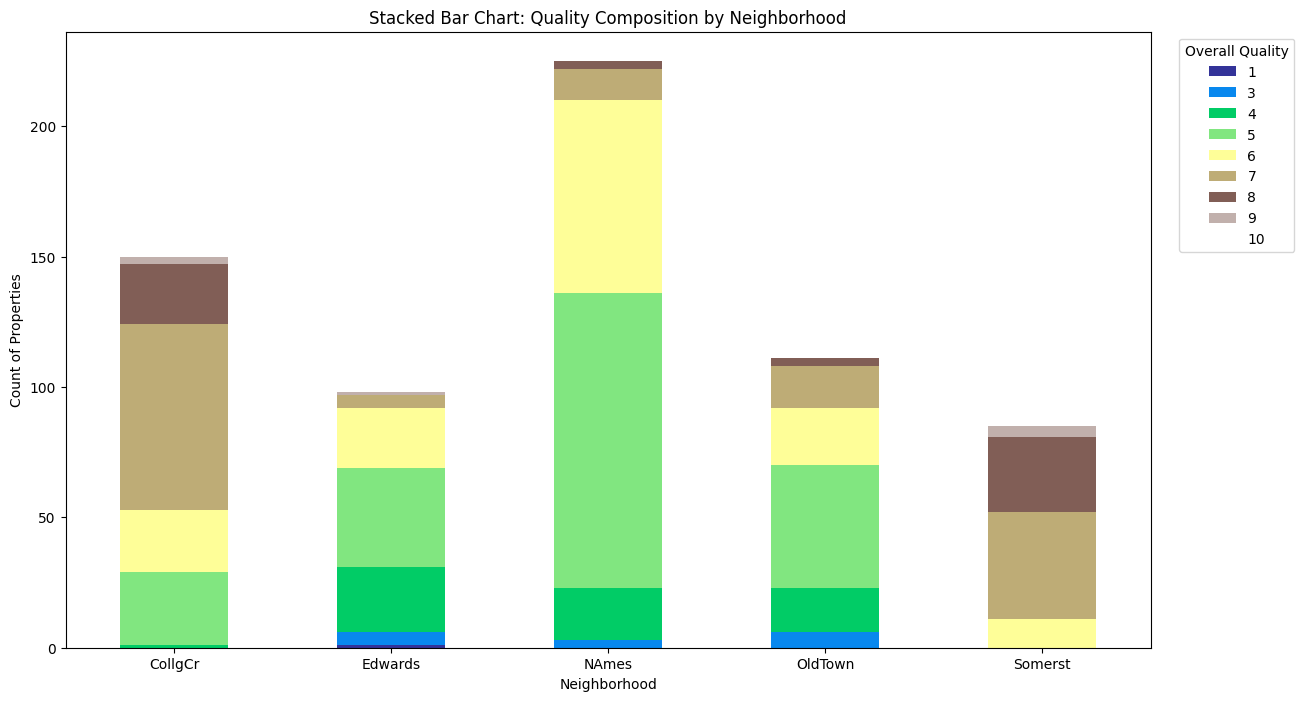

In [43]:
top_5_neighborhoods = df['Neighborhood'].value_counts().index[:5]
df_top5 = df[df['Neighborhood'].isin(top_5_neighborhoods)]

stacked_data = pd.crosstab(df_top5['Neighborhood'], df_top5['OverallQual'])

stacked_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='terrain')
plt.title('Stacked Bar Chart: Quality Composition by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count of Properties')
plt.legend(title='Overall Quality', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

This plot shows the makeup of each neighborhood. It shows if one neighborhood is mostly low-quality houses or high-quality houses.